<div style="text-align: center;">

  <!-- Logotipo -->
  <img src="img/LogoUesc.png" alt="UESC" style="width: 60px; display: block; margin: 0 auto 5px auto;">

  <!-- Cabeçalho -->
  <div style="font-size: 20px;"><strong>UNIVERSIDADE ESTADUAL DE SANTA CRUZ - UESC</strong></div>
  <div style="font-size: 18px;">DEPARTAMENTO DE ENGENHARIAS E COMPUTAÇÃO</div>
  <div style="font-size: 18px;">ENGENHARIA QUÍMICA</div>

  <hr style="margin: 20px 0; border: 1px solid #0074B7;">

  <!-- Título do Trabalho -->
  <div style="font-size: 22px; font-weight: bold; margin-bottom: 10px;">Modelagem, Simulação e Otimização de Processos Químicos</div>
  <div style="font-size: 20px; font-weight: bold; margin-bottom: 10px;">Modelagem de Reações Química em um Reator.</div>

  <!-- Autor e orientador -->
  <div style="font-size: 18px;">Prof. Dr. E.R.Edwards</div>

<hr style="margin: 20px 0; border: 1px solid #0074B7;">
  <!-- Data -->
<!-- <div style="font-size: 16px; margin-top: 15px;">Ilhéus - BA, Abril de 2025</div> -->
</div>

__Métodos de matrizes sparsas na modelagem de reatores__.

__Fonte__: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html

__Cálculos de matrizes diagonais__.

**Parâmetros**:

**Diagonais**
sequência de array_like
Sequência de matrizes contendo as diagonais da matriz, correspondentes a compensações.

**Deslocamentos**
sequência de int ou int, opcional

**Diagonais a definir**:
- k = 0 a diagonal principal (padrão)

- k > 0 a k-ésima diagonal superior

- k < 0 a k-ésima diagonal inferior

**forma**
Tupla de int, opcional
Forma do resultado. Se omitida, uma matriz quadrada grande o suficiente para conter as diagonais é retornado.

**formato**
{"dia", "csr", "csc", "lil", ...}, opcional
Formato matricial do resultado. Por padrão (format=None) um o formato de matriz esparso apropriado é retornado. Esta escolha é sujeito a alterações.

**dtype**
dtype, opcional
Tipo de dados da matriz.

__Matrizes triangulares__

**Fonte**: Anton Rorres, "Álgebra Linear com Aplicação". $8^o$ Edição. pág.67

Uma matriz quadrada na qual todas as entradas acima da diagonal principal são zero é chamada de **triangular inferior** e uma matriz na qual todas as entradas abaixo da diagonal principal são zeros é chamada **triangular superior**. Uma matriz que é triangular inferior ou triangular superior é chamada **triangular**.

__Exemplo__:
Matriz triangular superior $4x4$ arbitrária:

\begin{equation}
    \begin{bmatrix}
    {\color{blue}a_{11}} & a_{12} & a_{13} & a_{14} \\
    0 &  {\color{blue}a_{22}} & a_{23} & a_{24} \\
    0 & 0 & {\color{blue}a_{33}} & a_{34} \\
    0 & 0 & 0 &  {\color{blue}a_{44}} \\
    \end{bmatrix}
\end{equation}


Matriz triangular inferior $4x4$ arbitrária:

\begin{equation}
    \begin{bmatrix}
    {\color{blue}a_{11}} & 0 & 0 & 0  \\
   a_{21} &  {\color{blue}a_{22}} & 0 & 0 \\
    a_{31} & a_{32} & {\color{blue}a_{33}} & 0 \\
    a_{41} & a_{42} & a_{43} &  {\color{blue}a_{44}} \\
    \end{bmatrix}
\end{equation}

__Exemplo__:
Considere as matrizes triangulares superior abaixo.

\begin{equation}
A = 
    \begin{bmatrix}
    1 & 3  & -1  \\
    0 & 2  & 4  \\
    0 & 0  & 5 \\
    \end{bmatrix}
    \
B = 
    \begin{bmatrix}
    3 & -2  & 2  \\
    0 & 0  & -1  \\
    0 & 0  & 1 \\
    \end{bmatrix}
\end{equation}

A matriz A é inversível, pois suas entradas na diagonal principal são não-nulas, mas a matriz $B$ não é. Ou seja, para que você consiga calcular a inversa da matriz ($A^{-1}$) diagonal superior ou inferior, os valores armazenados não podem ter nenhum zero.

__Exercício 1__ 

Imprima a matriz A aplicando o método apresentado na parte teórica.

\begin{equation}
A = 
    \begin{bmatrix}
    1 & 0 & 1 & 0 \\
    1 & 2 & 0 & 2 \\
    0 & 2 & 3 & 0 \\
    0 & 0 & 3 & 4 \\
    \end{bmatrix}
\end{equation}

In [1]:
from scipy.sparse import diags

In [2]:
diagonals = [[1, 2, 3, 4], [1, 2, 3], [1, 2]]
Matrix = diags(diagonals, [0, -1, 2]).toarray()
Matrix

array([[1., 0., 1., 0.],
       [1., 2., 0., 2.],
       [0., 2., 3., 0.],
       [0., 0., 3., 4.]])

__Exercício 2__:

A transmissão de escalares é suportada (mas a forma (shape) precisa ser especificada):

**Explicação**:

Suponha que você queira uma matriz em que a diagonal superior inferior seja formada por $1$ na primeira diagonal inferior $k=-1$, formada por $2$ na diagonal principal $k=0$ e formada por $1$ na primeira diagonal superior $k=1$. E que essa matriz seja de $4x4$. O código abaixo mostra que a primeira lista $[1, -2, 1]$ mostra os valores numéricos para cada diagonal, começando com a diagonal inferior, e a segunda lista $[-1, 0, 1]$ mostra a posição dessas diagonais $[k1, k2, k3]$ sendo $k1$ a diagonal inferior, $k=0$ a diaganal principal e $k=1$ a diagonal superior.

In [3]:
Matrix_2 = diags([1, -2, 1], [-1, 0, 1], shape=(4, 4)).toarray()
Matrix_2

array([[-2.,  1.,  0.,  0.],
       [ 1., -2.,  1.,  0.],
       [ 0.,  1., -2.,  1.],
       [ 0.,  0.,  1., -2.]])

Se apenas uma diagonal for desejada (como em numpy.diag), o seguinte também funciona:

In [4]:
Matrix_3 = diags([1, 2, 3], 1).toarray()
Matrix_3

array([[0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 3.],
       [0., 0., 0., 0.]])

Agora vamos para uma aplicação na resolução de um problema de Engenharia Química.

 Modelagem de Reações Químicas em um Reator

Considere um reator químico que opera com as seguintes reações:

1. Reação 1: A + B → C
2. Reação 2: C → D

Neste sistema, temos as seguintes taxas de reação:

- Taxa de consumo de A ($ r_A $): <br>
$ r_A = k_1.C_A.C_B $

- Taxa de consumo de B ($ r_B $): <br>
$ r_B = k_1.C_A.C_B $

- Taxa de formação de C ($ r_C $): <br>
$ r_C = k_1.C_A.C_B - k_2.C_C $

- Taxa de formação de D ($r_D$):<br>
$ r_D = k_2.C_c $

onde: <br>

- $C_A$, $C_B$, $C_C$ são as concentrações dos componentes $A$, $B$, $C$ e $D$, respectivamente.

- $k_1$ e $k_2$ são as constantes de velocidade das reações.

Agora, vamos montar o sistema de **Equações Diferenciais** para modelar a evolução das concentrações ao longo do tempo:

1. $\frac{dC_A}{dt} = -r_A$ <br>

2. $\frac{dC_B}{dt} = -r_B$ <br>

3. $\frac{dC_C}{dt} = r_C$  <br>

4. $\frac{dC_D}{dt} =  r_D$ <br>

<img src="img/reator_matriz.png" alt="UESC" style="width: 650px; display: block; margin: 0 auto 5px auto;">
<p style="text-align: center;"><strong>Figura: Desenho esquemático de um reator.</strong></p>

A matriz $A$ com os coeficientes das concentrações é:

\begin{equation}
A = 
\begin{bmatrix}
-1 &  0 & 0 & 0 \\
 0 & -1 & 1 & 0 \\
 0 & 0 & -1 & 1\\
 0 & 0 & 0 & -1 \\
\end{bmatrix}
\end{equation}

O vetor $b$ com as concentrações iniciais é:

\begin{equation}
b = 
\begin{bmatrix}
C_{A0} \\
C_{B0} \\
C_{C0} \\
C_{D0}
\end{bmatrix}
\end{equation}

Agora, vamos resolver numericamente o sistema de equações diferenciais usando a biblioteca scipy.sparse e plotar os resultados em um gráfico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.integrate import solve_ivp

# IVP - Problema de Valor Inicial

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [7]:
# Parâmetros
k1 = 0.1
k2 = 0.05
C_A0 = 1.0
C_B0 = 0.5
C_C0 = 0.01
C_D0 = 0.01

In [8]:
# Criando a matriz esparsa.

diagonals = np.array([[-1, 0, 0, 0], [0, -1, 1, 0], [0, 0, -1, 1], [0, 0, 0, -1]])

diagonals

array([[-1,  0,  0,  0],
       [ 0, -1,  1,  0],
       [ 0,  0, -1,  1],
       [ 0,  0,  0, -1]])

In [9]:
A = diags(diagonals, [0, 1, 2, 3]).toarray()
A

array([[-1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.]])

In [10]:
# Sistema de equações diferenciais.
def reator(t, y):
    return A @ y
# Anotação acima @ significa multiplicação matricial.
    
# Tempo de simulação.
t_span = (0, 10) # 10 unidades de tempo.

# Resolvendo as equações diferenciais.
sol = solve_ivp(reator, t_span,  [C_A0, C_B0, C_C0, C_D0], t_eval=np.linspace(0, 10, 100))

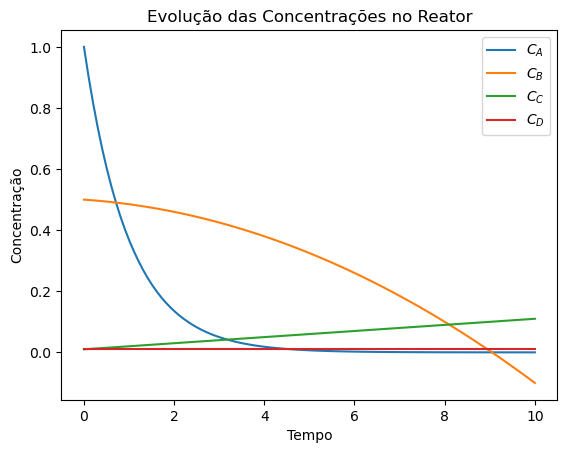

In [11]:
# Plotando os resultados
plt.plot(sol.t, sol.y[0], label='$C_A$')
plt.plot(sol.t, sol.y[1], label='$C_B$')
plt.plot(sol.t, sol.y[2], label='$C_C$')
plt.plot(sol.t, sol.y[3], label='$C_D$')
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.title('Evolução das Concentrações no Reator')
plt.show()

<div style="text-align: center; font-size: 12px; color: gray; margin-top: 40px;">
  Este notebook foi desenvolvido no âmbito do Grupo de Pesquisas em Modelagem Computacional da UESC.<br>
  Todos os direitos reservados © 2025
</div>